In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
import itertools

import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 5]

edges = [('A','B'),('A','C'),('B','C'),('B','D'),('D','E'),('D','G'),('D','F'),('E','F'),('G','F')]

pos = {'A': [0.0, 0.0], 'B': [1.0, 0.0], 'C': [0.5, -1.0], 'D': [2.0, 0.0],
        'E': [3.0,  0.0], 'F': [3.0,  -1.0], 'G': [2.0, -1.0]}

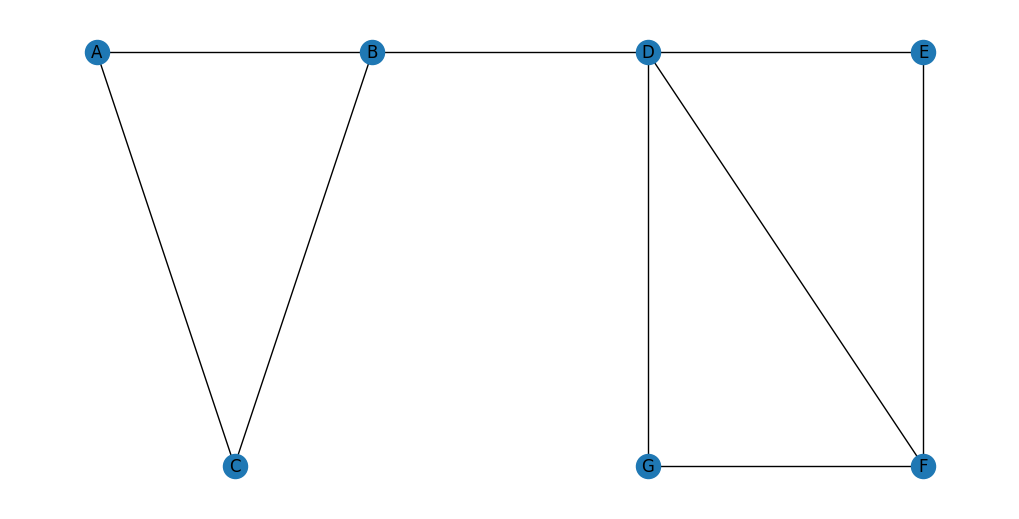

In [2]:
G = nx.Graph()
G.add_edges_from(edges)
nx.draw(G,pos,with_labels = True)
#nx.draw(G,with_labels = True)

In [3]:
from networkx import edge_betweenness_centrality as betweenness

comp = betweenness(G,normalized=False)
print(comp)

G1 = nx.Graph()
G1.add_edges_from(edges)

{('A', 'B'): 5.0, ('A', 'C'): 1.0, ('B', 'C'): 5.0, ('B', 'D'): 12.0, ('D', 'E'): 4.5, ('D', 'G'): 4.5, ('D', 'F'): 4.0, ('E', 'F'): 1.5, ('G', 'F'): 1.5}


{('A', 'B'): Text(0.5, 0.0, '5.0'),
 ('A', 'C'): Text(0.25, -0.5, '1.0'),
 ('B', 'C'): Text(0.75, -0.5, '5.0'),
 ('B', 'D'): Text(1.5, 0.0, '12.0'),
 ('D', 'E'): Text(2.5, 0.0, '4.5'),
 ('D', 'G'): Text(2.0, -0.5, '4.5'),
 ('D', 'F'): Text(2.5, -0.5, '4.0'),
 ('E', 'F'): Text(3.0, -0.5, '1.5'),
 ('G', 'F'): Text(2.5, -1.0, '1.5')}

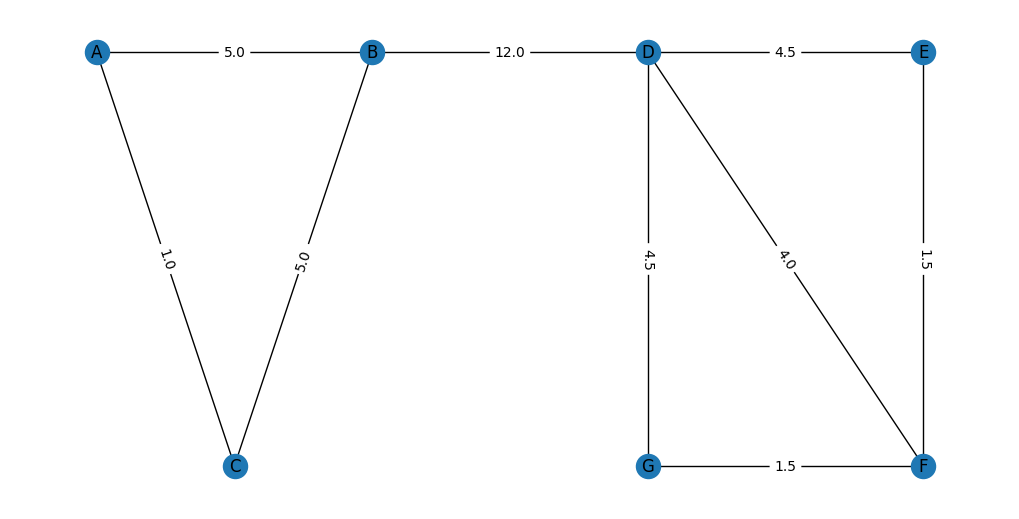

In [4]:
nx.draw(G1,pos,with_labels = True)
comp_b = betweenness(G1,normalized=False)
nx.draw_networkx_edge_labels(G1,pos,edge_labels = comp_b)

In [6]:
from networkx.algorithms.community.centrality import girvan_newman
from operator import itemgetter
from time import sleep

def heaviest(G):
    u, v, w = max(G.edges(data='weight'), key=itemgetter(2))
    return (u, v)

In [7]:
# getting the weights
comp_b = betweenness(G1,normalized=False)

#print(comp_b)

# New graph
Gw = nx.Graph()


for a,b in zip(comp_b.keys(),comp_b.values()):
        Gw.add_edge(a[0], a[1], weight=b)

k = 3

print(list(Gw.nodes))
print("Clusters")
comp_gn = girvan_newman(Gw, most_valuable_edge=heaviest)
for communities in itertools.islice(comp_gn, k):
    sleep(2)
    print(tuple(sorted(c) for c in communities))

['A', 'B', 'C', 'D', 'E', 'G', 'F']
Clusters
(['A', 'B', 'C'], ['D', 'E', 'F', 'G'])
(['A', 'C'], ['B'], ['D', 'E', 'F', 'G'])
(['A', 'C'], ['B'], ['D'], ['E', 'F', 'G'])


In [9]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# load data
#data = np.loadtxt("data/Cross_Parker-Manufacturing_aware.txt").astype(np.int32)
data = np.loadtxt("data/OF_two-mode_weightedmsg.txt").astype(np.int32)
print(data)

[[  1   1   1]
 [  1  39   9]
 [  1 102   2]
 ...
 [897  59   4]
 [898 357   1]
 [899  52   1]]


In [10]:
# make the graph
N = 77    # nodes
w1 = 5    # threshold's weight 

G = nx.Graph()
for i in range(1, N):
    G.add_node(i)
for n1, n2, w in data:
    if w >= w1:
        G.add_edge(n1, n2, weight=w)

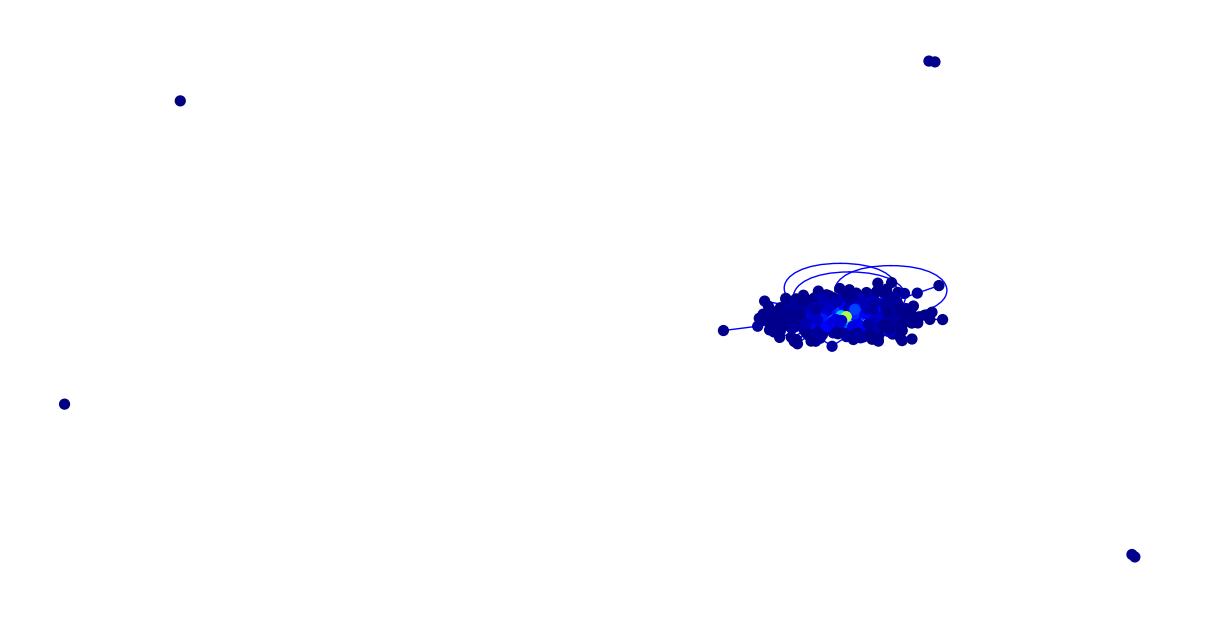

In [11]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12, 6]

# show graph
node_degrees_1 = nx.degree(G)
node_degrees = list(dict(node_degrees_1).values())
nx.draw(G, node_size=50, edge_color="b", cmap=plt.get_cmap('jet'), node_color = node_degrees)
plt.show()

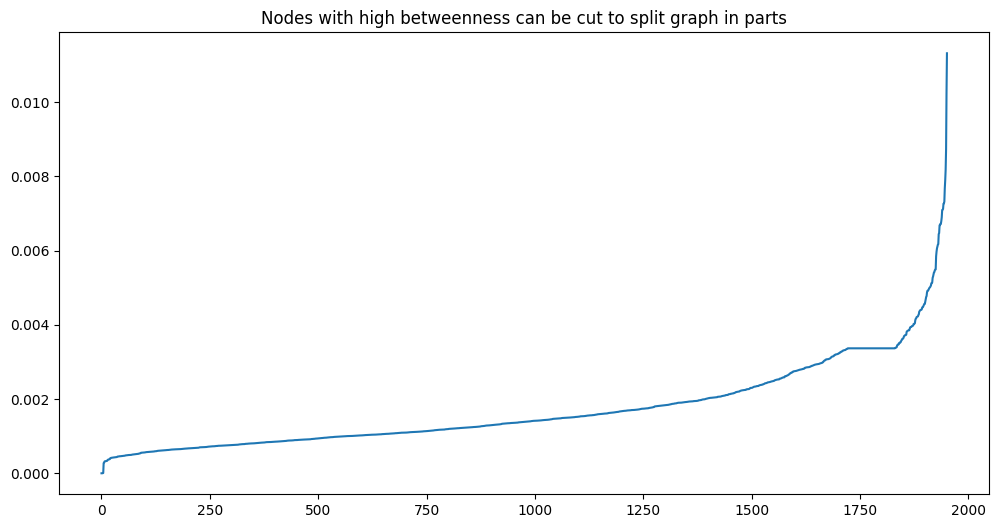

In [12]:
# print betweenness
bt = list(nx.edge_betweenness_centrality(G).values())
plt.plot(range(len(bt)), sorted(bt))
plt.title("Nodes with high betweenness can be cut to split graph in parts")
#plt.ylim([0, 0.02])
plt.show()

In [13]:
# remove edges with betweenness larger than threshold
thr = 0.8 # around 80% of the max value
while True:
    bt = nx.edge_betweenness_centrality(G)
    
    i = np.argmax(list(bt.values()))
    if list(bt.values())[i] < (thr):
        break
    n1, n2 = list(bt.keys())[i]
    G.remove_edge(n1, n2)

# clean graph from single-node components for easy printing
for n, d in list(nx.degree(G)):
    if d == 0:
        G.remove_node(n)

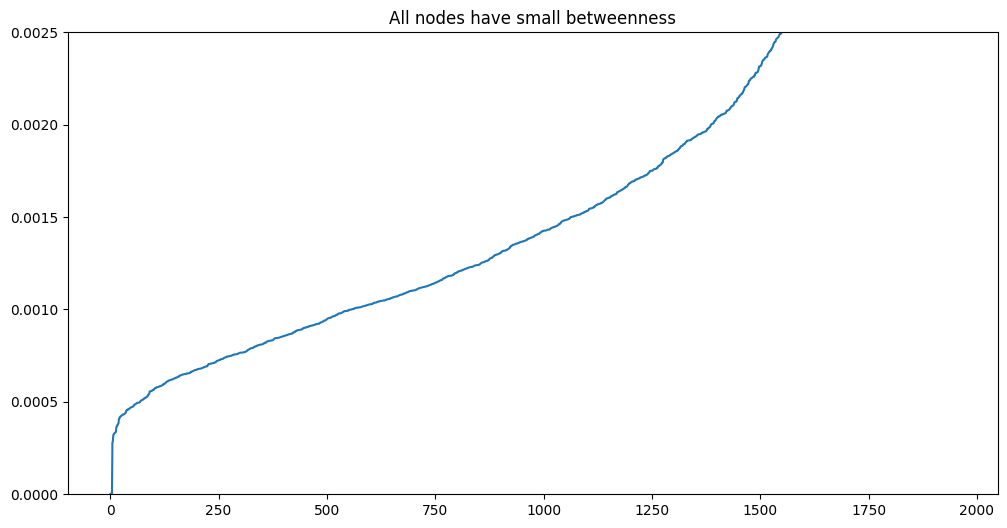

In [14]:
# print new betweenness
bt = nx.edge_betweenness_centrality(G).values()
plt.plot(range(len(bt)), sorted(bt))
plt.title("All nodes have small betweenness")
plt.ylim([0, 0.0025])
plt.show()

In [15]:
print(nx.__version__)

3.1


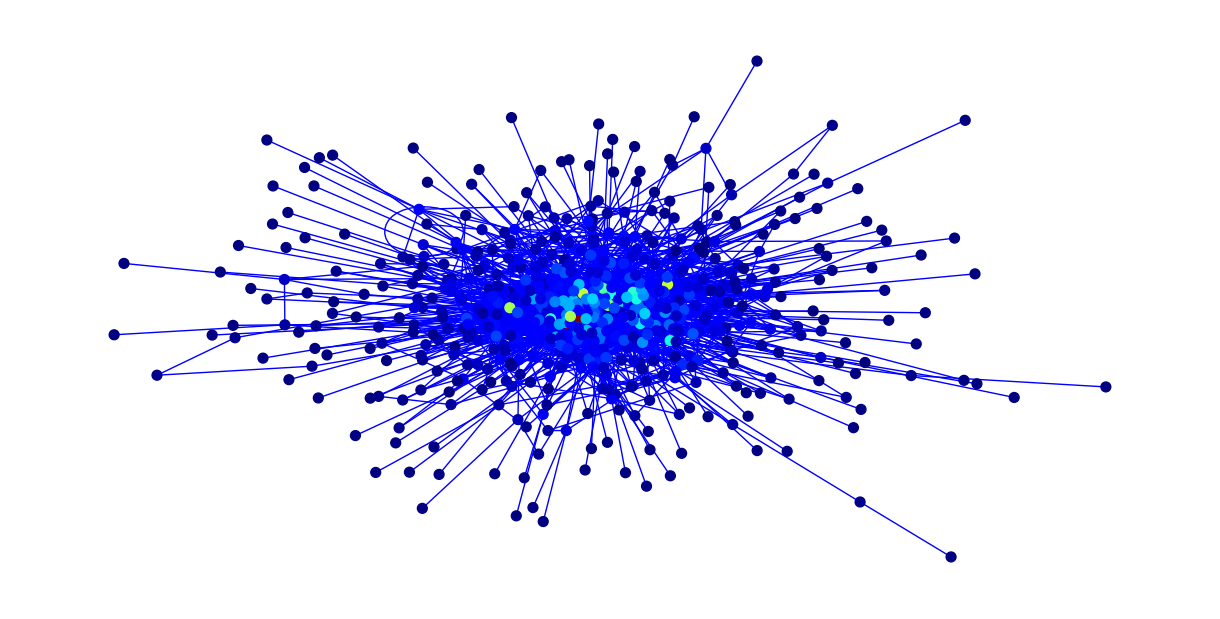

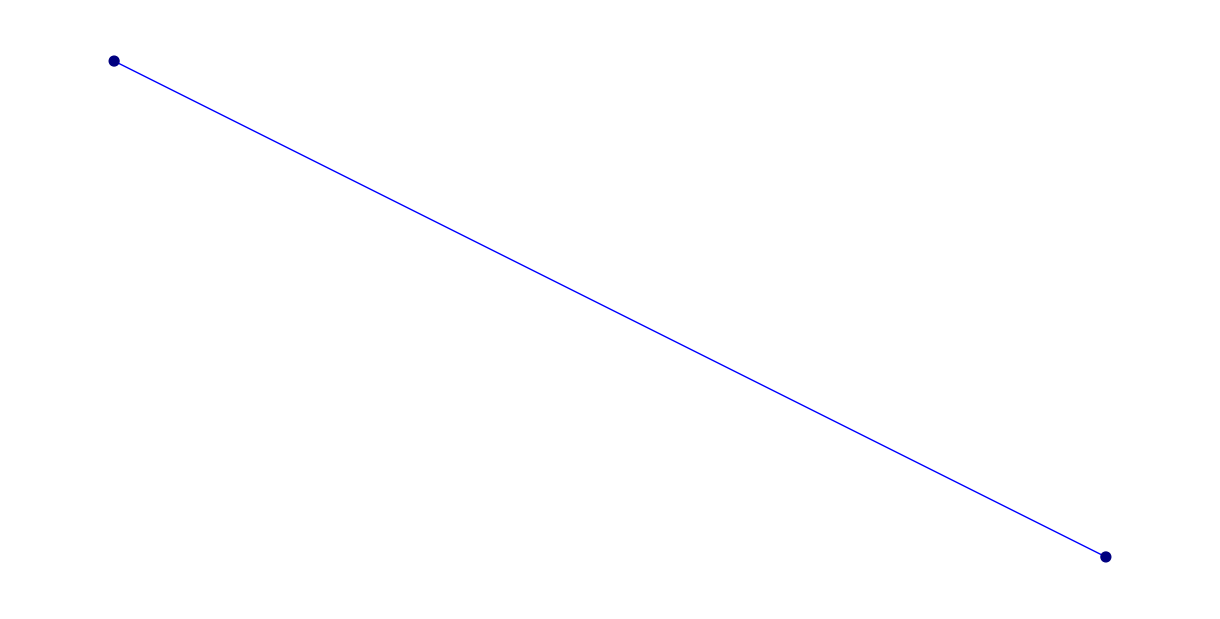

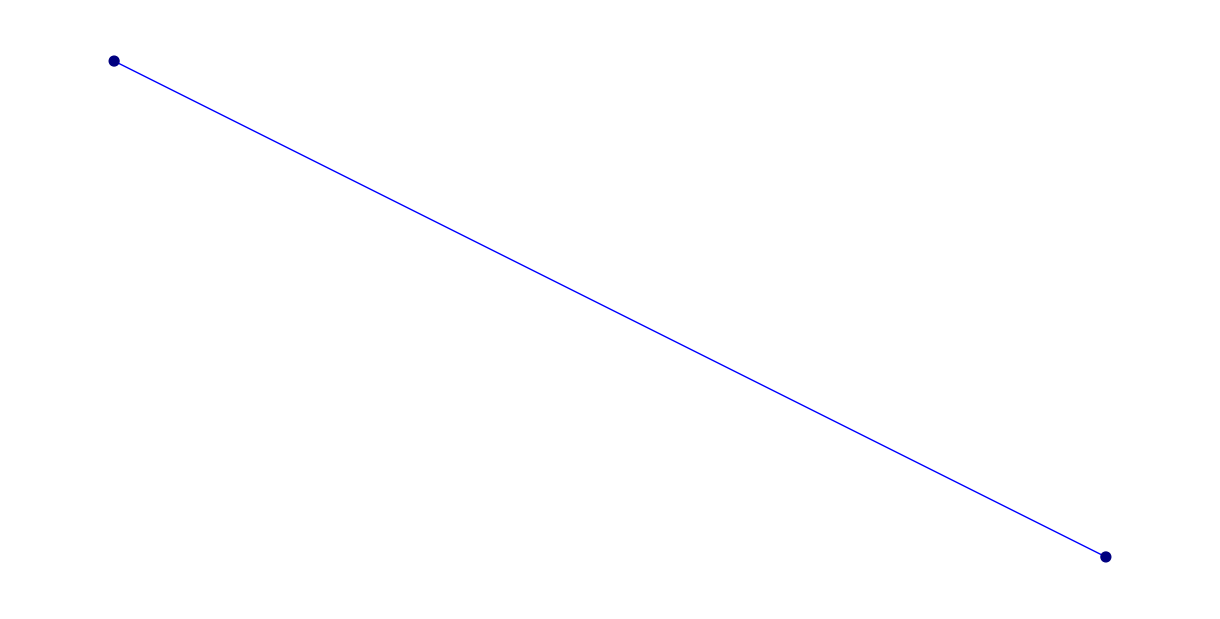

In [16]:
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)
        
# print found components
#for G1 in nx.connected_component_subgraphs(G):  # for nx < 2.4 version
for G1 in connected_component_subgraphs(G): # for nx >= 2.4 version
    node_degrees = list(dict(nx.degree(G1)).values())
    nx.draw(G1, node_size=50, edge_color="b", cmap=plt.get_cmap('jet'), node_color = node_degrees)
    plt.show()

In [17]:
from ipycytoscape import CytoscapeWidget
import networkx as nx
G2 = nx.complete_graph(5)
cyto = CytoscapeWidget()
cyto.graph.add_graph_from_networkx(G2)
display(cyto)

CytoscapeWidget(cytoscape_layout={'name': 'cola'}, cytoscape_style=[{'selector': 'node', 'css': {'background-c…

In [18]:
import ipycytoscape
import ipywidgets as widgets

cytoscapeobj = ipycytoscape.CytoscapeWidget()
button = widgets.Button(description="nx graph")
output = widgets.Output()

# Generates a NX graph every time you click the button
def on_button_clicked(b):
    with output:
        cytoscapeobj.graph.add_graph_from_networkx(nx.complete_graph(5))

button.on_click(on_button_clicked)
widgets.HBox([button, cytoscapeobj])

In [19]:
cytoscapeobj = ipycytoscape.CytoscapeWidget()
button = widgets.Button(description="nx graph")
output = widgets.Output()

# Generates a NX graph every time you click the button
def on_button_clicked(b):
    with output:
        cytoscapeobj.graph.add_graph_from_networkx(G)

button.on_click(on_button_clicked)
widgets.HBox([button, cytoscapeobj])

{'A': 2, 'B': 2, 'K': 1, 'C': 2, 'F': 1, 'G': 0, 'E': 1, 'D': 0, 'H': 0, 'I': 0, 'J': 0}


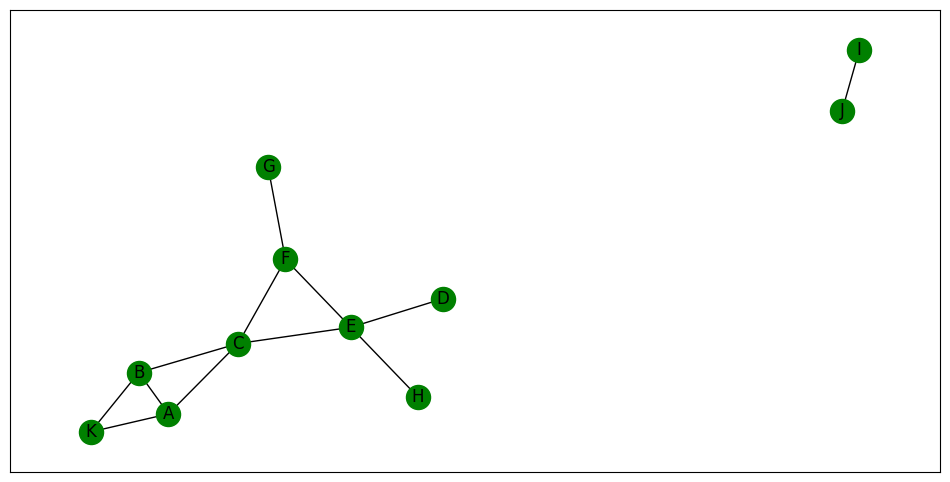

In [20]:
import networkx as nx
 
G2 = nx.Graph()
 
G2.add_edges_from([('A', 'B'), ('A', 'K'), ('B', 'K'), ('A', 'C'),
                  ('B', 'C'), ('C', 'F'), ('F', 'G'), ('C', 'E'),
                  ('E', 'F'), ('E', 'D'), ('E', 'H'), ('I', 'J')])
 
nx.draw_networkx(G2, with_labels = True, node_color ='green')
print(nx.triangles(G2))

In [21]:
number_of_triangles = sum(nx.triangles(G2).values()) / 3
print(number_of_triangles)

3.0


In [22]:
cliq_list = list(nx.clique.enumerate_all_cliques(G2))
triangle_list = [ x for x in cliq_list if len(x)==3]
print(triangle_list)

[['A', 'B', 'K'], ['A', 'B', 'C'], ['C', 'F', 'E']]


In [23]:
%matplotlib inline  
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# load data
data = np.loadtxt("data/Cross_Parker-Manufacturing_aware.txt").astype(np.int32)

# make the graph
N = 77
w1 = 6

G = nx.Graph()
for i in range(1, N):
    G.add_node(i)
for n1, n2, w in data:
    if w >= w1:
        G.add_edge(n1, n2, weight=w)

In [24]:
print(nx.triangles(G))

{1: 0, 2: 0, 3: 17, 4: 36, 5: 30, 6: 20, 7: 18, 8: 6, 9: 0, 10: 0, 11: 12, 12: 6, 13: 90, 14: 12, 15: 27, 16: 18, 17: 2, 18: 291, 19: 101, 20: 87, 21: 57, 22: 241, 23: 274, 24: 172, 25: 232, 26: 91, 27: 184, 28: 258, 29: 277, 30: 89, 31: 85, 32: 133, 33: 125, 34: 109, 35: 235, 36: 148, 37: 66, 38: 138, 39: 103, 40: 94, 41: 258, 42: 239, 43: 253, 44: 248, 45: 46, 46: 14, 47: 17, 48: 37, 49: 79, 50: 35, 51: 17, 52: 61, 53: 33, 54: 47, 55: 96, 56: 80, 57: 52, 58: 45, 59: 19, 60: 69, 61: 28, 62: 15, 63: 31, 64: 29, 65: 9, 66: 14, 67: 17, 68: 173, 69: 66, 70: 7, 71: 20, 72: 6, 73: 32, 74: 20, 75: 45, 76: 19, 77: 14}


In [25]:
number_of_triangles = sum(nx.triangles(G).values()) / 3
print(number_of_triangles)

2058.0


In [26]:
cliq_list = list(nx.clique.enumerate_all_cliques(G))
triangle_list = [ x for x in cliq_list if len(x)==3]


In [27]:
print(triangle_list)

[[3, 4, 5], [3, 4, 7], [3, 4, 13], [3, 4, 16], [3, 4, 55], [3, 5, 7], [3, 5, 8], [3, 5, 13], [3, 5, 16], [3, 5, 55], [3, 7, 13], [3, 7, 55], [3, 8, 13], [3, 8, 55], [3, 13, 16], [3, 13, 55], [3, 16, 55], [4, 5, 7], [4, 5, 13], [4, 5, 15], [4, 5, 16], [4, 5, 18], [4, 5, 55], [4, 5, 60], [4, 6, 7], [4, 6, 12], [4, 6, 13], [4, 6, 15], [4, 6, 18], [4, 6, 55], [4, 6, 60], [4, 7, 13], [4, 7, 15], [4, 7, 55], [4, 12, 13], [4, 12, 16], [4, 13, 15], [4, 13, 16], [4, 13, 18], [4, 13, 55], [4, 13, 60], [4, 15, 16], [4, 15, 18], [4, 15, 55], [4, 16, 55], [4, 18, 55], [4, 18, 60], [4, 55, 60], [5, 7, 13], [5, 7, 15], [5, 7, 55], [5, 8, 13], [5, 8, 55], [5, 13, 15], [5, 13, 16], [5, 13, 18], [5, 13, 55], [5, 13, 60], [5, 15, 16], [5, 15, 18], [5, 15, 55], [5, 16, 55], [5, 18, 55], [5, 18, 60], [5, 55, 60], [6, 7, 13], [6, 7, 15], [6, 7, 55], [6, 12, 13], [6, 13, 15], [6, 13, 18], [6, 13, 55], [6, 13, 60], [6, 15, 18], [6, 15, 55], [6, 18, 55], [6, 18, 60], [6, 55, 60], [7, 13, 15], [7, 13, 55], [7, 

In [28]:
%matplotlib inline  
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 6]

# load data
#data = np.loadtxt("data/Cross_Parker-Manufacturing_aware.txt").astype(np.int32)
data = np.loadtxt("data/OF_two-mode_weightedmsg.txt").astype(np.int32)
N = 46
wt = 2

# create and populate the graph
G = nx.Graph()
for i in range(1, N+1):
    G.add_node(i)
for n1, n2, w in data:
    if w >= wt:
        G.add_edge(n1, n2, weight=w)

L = nx.laplacian_matrix(G).toarray()

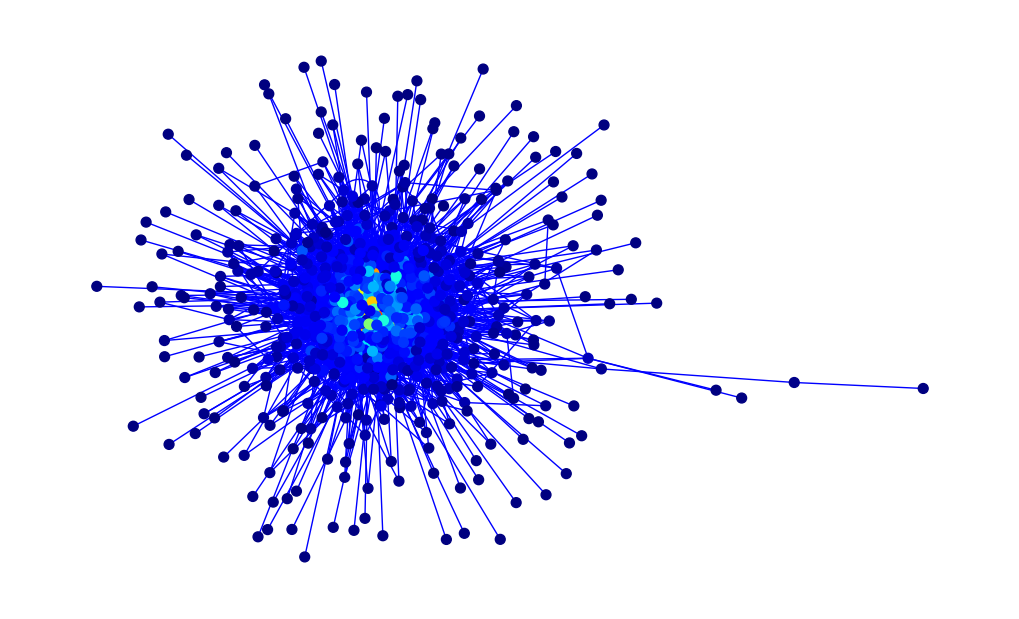

In [29]:
# show graph
node_degrees = list(dict(nx.degree(G)).values())
nx.draw(G, node_size=50, edge_color="b", cmap=plt.get_cmap('jet'), node_color = node_degrees)
plt.show()

In [ ]:
#np.linalg.svd?

In [30]:
# find eigenvectors of Laplacian matrix,
# take second smallest and third smallest
u,s,v = np.linalg.svd(L)
ev2 = u[:, -2]
ev3 = u[:, -4]

In [31]:
u.shape

(761, 761)

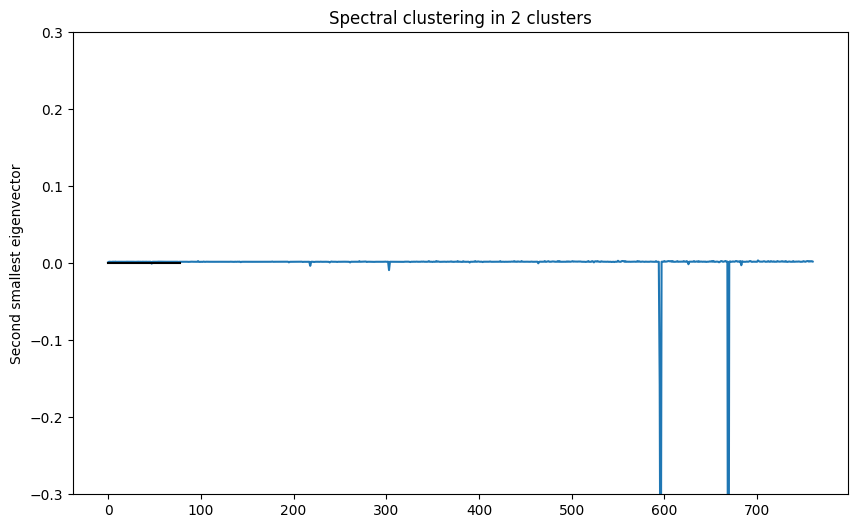

In [32]:
# print second smallest eigenvector
plt.plot(ev2)
plt.ylim([-0.3, 0.3])
plt.plot([0, 78], [0, 0], '-k')
plt.title("Spectral clustering in 2 clusters")
plt.ylabel("Second smallest eigenvector")
plt.show()

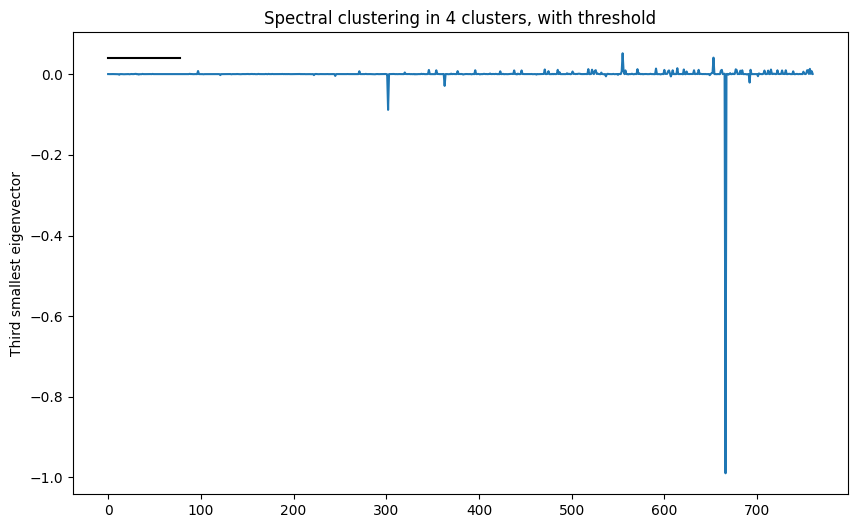

In [33]:
# print third smallest eigenvector
plt.plot(ev3)
plt.plot([0, 78], [0.04, 0.04], '-k')
plt.title("Spectral clustering in 4 clusters, with threshold")
plt.ylabel("Third smallest eigenvector")
plt.show()

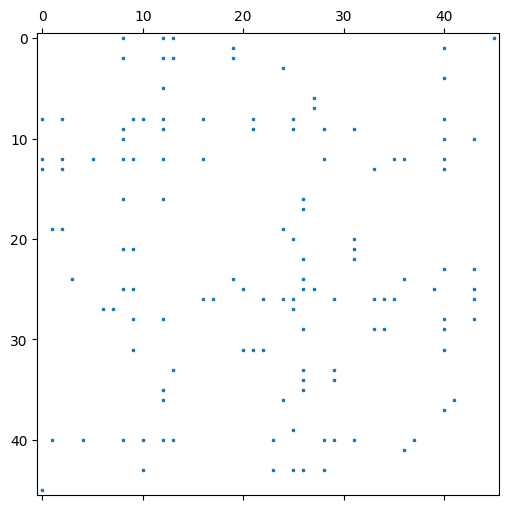

In [34]:
# adjacency matrix of un-ordered graph (JUST one examle)
ix = np.arange(N)
np.random.shuffle(ix)
A = nx.adjacency_matrix(G)
A = A[ix,:][:,ix]
plt.spy(A, markersize=2.0)

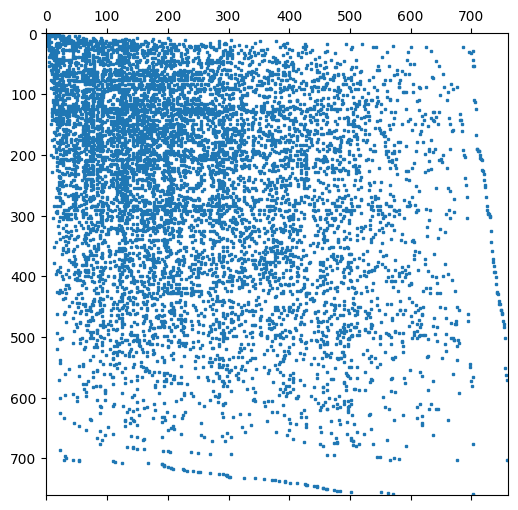

In [35]:
# adjacency matrix ordered by 2nd smallest eigenvector
ix = np.argsort(ev2)
A = nx.adjacency_matrix(G)
A = A[ix,:][:,ix]
plt.spy(A, markersize=2.0)

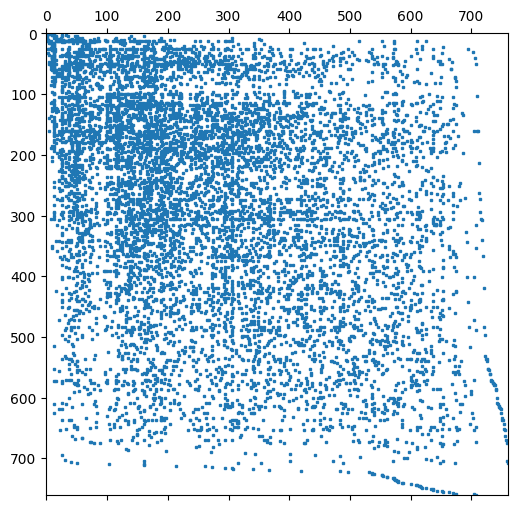

In [36]:
# adjacency matrix ordered by 3rd smallest eigenvector
ix = np.argsort(ev3)
A = nx.adjacency_matrix(G)
A = A[ix,:][:,ix]
plt.spy(A, markersize=2.0)

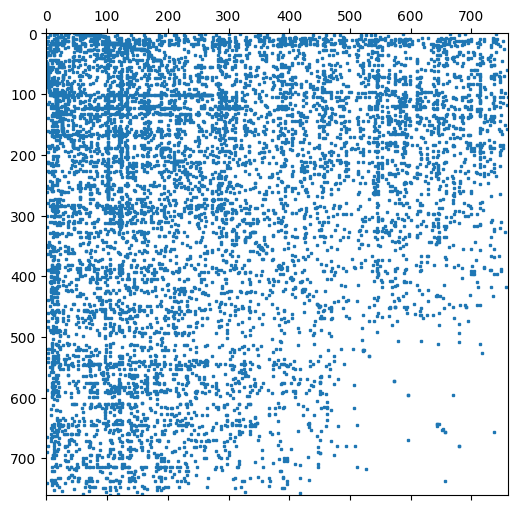

In [37]:
# ideal adjacency matrix (from the original dataset)
A = nx.adjacency_matrix(G)
plt.spy(A, markersize=2.0)

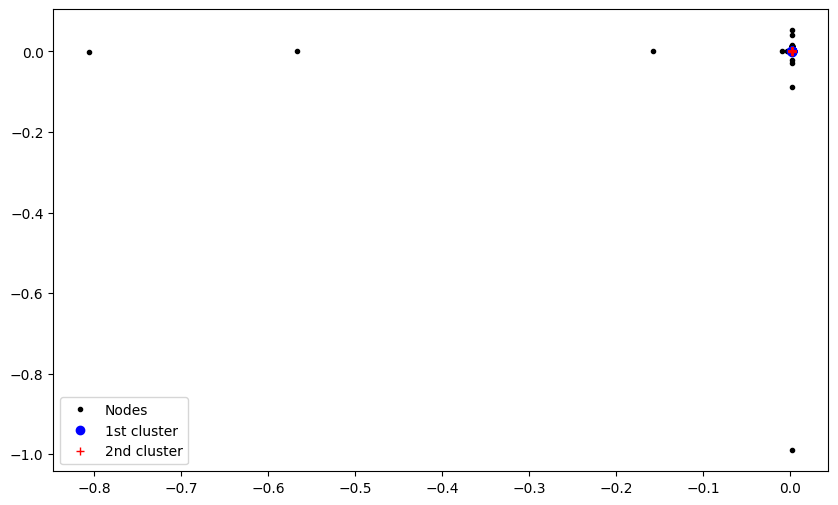

In [38]:
# graph shown in coordinates of two last eigenvectors
vert = dict(nx.degree(G)).keys()
plt.plot(ev2[2:], ev3[2:], '.k')
plt.plot(ev2[2:18], ev3[2:18], 'ob')
plt.plot(ev2[18:45], ev3[18:45], '+r')
plt.legend(['Nodes', '1st cluster', '2nd cluster'], loc=3)
plt.show()

In [39]:
#!pip install tarjan
from tarjan.tc import tc
a = tc({1:[2],2:[1,5],3:[4],4:[3,5],5:[6],6:[7],7:[8],8:[6,9],9:[]})

In [40]:
print(a)

{9: (), 8: (8, 9, 6, 7), 7: (8, 9, 6, 7), 6: (8, 9, 6, 7), 5: (8, 9, 6, 7), 2: (1, 2, 5, 6, 7, 8, 9), 1: (1, 2, 5, 6, 7, 8, 9), 4: (3, 4, 5, 6, 7, 8, 9), 3: (3, 4, 5, 6, 7, 8, 9)}
